In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import numpy as np

# Cancer Inhibitors dataset
Following dataset is coming from https://www.kaggle.com/xiaotawkaggle/inhibitors

On Leho there is an adapted csv of the cdk2.h5 dataset. The adaptations I already did for you was extracting the data out of the .h5 file. Renaming the columns, add in the IDs of each of the compounds (row names) and combine it with the target into a .csv file.

For cdk2, 1890 potential inhibitors are collected from chembl database, in which molecules with IC50 lower than 10 uM are usually considered as inhibitors, otherwise non-inhibitors.

The rownames represent the CHEMBL Id, which can be used to search the CHEMBL database: https://www.ebi.ac.uk/chembl/

The features are split into 3 categories that represent three different sets of molecular fingerprints calculated by RDKIT. For more information: http://www.rdkit.org/docs/GettingStartedInPython.html#topological-fingerprints
* ap: Atom Pairs
* mg: Morgan Fingerprints (Circular Fingerprints)
* tt: Topological Torsions

The actual values represent if a molecular fingerprint is present in a specific molecule or not (1: present, 0: not present)

The target column indicated if the molecule is considered an inhibitor or not.

In [3]:
# Read in the data, because we have row names in our dataset, use pd.read_csv('filename.csv',index_col=0)
data = pd.read_csv("data/cdk2.csv", index_col=0)
# Take a look at the first rows of the dataframe
data.head(10)

,ap_1,ap_2,ap_3,ap_4,ap_5,ap_6,ap_7,ap_8,ap_9,ap_10,...,tt_2031,tt_2032,tt_2033,tt_2034,tt_2035,tt_2036,tt_2037,tt_2038,tt_2039,target
CHEMBL405042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL258805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL318485,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CHEMBL260417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL101557,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CHEMBL48614,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL72510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL411426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL101558,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CHEMBL260103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Take a look at the number of rows and columns in the dataframe
data.shape

(1890, 6118)

<Axes: xlabel='target', ylabel='count'>

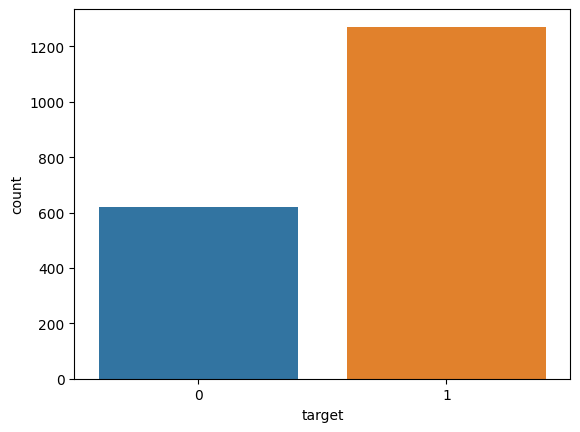

In [5]:
# Plot the counts of the target column using  a seaborn countplot
sns.countplot(data, x = "target")

<Axes: xlabel='ap_1', ylabel='count'>

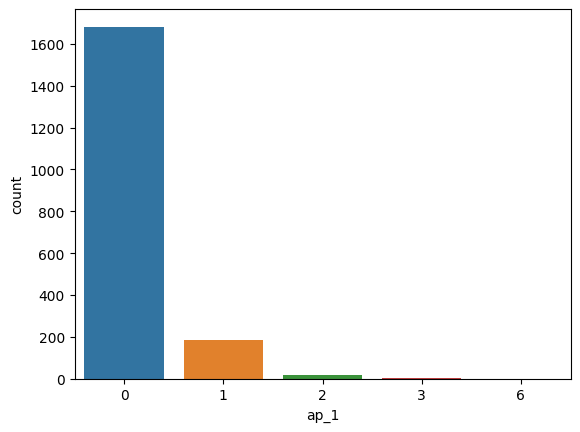

In [6]:
# Plot a countplot of the first feature column (ap_1)
sns.countplot(data, x = "ap_1")

**What is noteworthy of the plot above?**
The data is pretty unbalanced, a lot of features are labbeled 0 whil the other labels are not present or that much.


**Notes:**
Due to the amount of columns, a df.describe() will not show you a lot of information.

Pairplots and corrplots would be gigantic and also not very informative due to it being sparse data.

Removing outliers would not be a good idea, since a lot of the values that are different from 0 would already be considered outliers, whilst these are just the informative things.
    

In [7]:
# Split into features and targets
X = data.drop("target", axis = 1)
y = data["target"]

In [13]:
# Split into training and test set. Keep +-20% as a test_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Create a multinomial naive bayes classifier
NBMod = MultinomialNB(alpha=1)


# Fit the training data
NBMod.fit(X_train, y_train)

# Show the score of the test data
print(f" The test score of the train model: {NBMod.score(X_train, y_train)}")
print(f" The test score of the train model: {NBMod.score(X_test, y_test)}")

 The test score of the train model: 0.796957671957672
 The test score of the train model: 0.7592592592592593


In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

The Test model:
[[ 89  18]
 [ 73 198]]
The Train model:
[[422  90]
 [217 783]]
Y-TEST SET


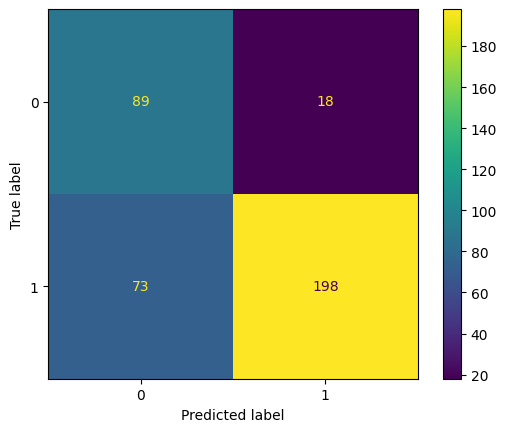

Y-TRAIN SET


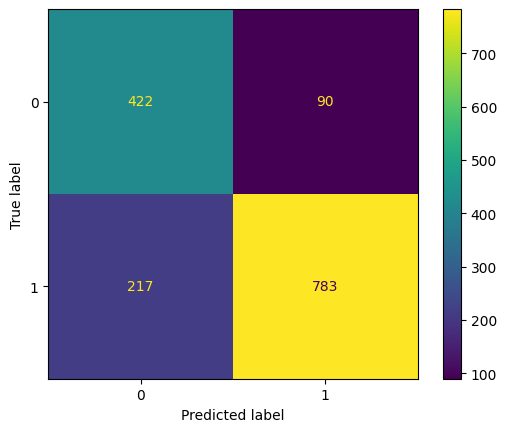


Classification report TEST:
              precision    recall  f1-score   support

           0       0.55      0.83      0.66       107
           1       0.92      0.73      0.81       271

    accuracy                           0.76       378
   macro avg       0.73      0.78      0.74       378
weighted avg       0.81      0.76      0.77       378


Classification report TRAIN:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       512
           1       0.90      0.78      0.84      1000

    accuracy                           0.80      1512
   macro avg       0.78      0.80      0.78      1512
weighted avg       0.82      0.80      0.80      1512



In [24]:
# Predict values for the test set
y_pred_train = NBMod.predict(X_train)
y_pred_test = NBMod.predict(X_test)

# Print a confusion matrix and classification report
print(f"The Test model:\n{confusion_matrix(y_test, y_pred_test)}")
print(f"The Train model:\n{confusion_matrix(y_train, y_pred_train)}")

matrix_test = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test) ,display_labels=NBMod.classes_) # Without display_labels it will show class
matrix_train = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train) ,display_labels=NBMod.classes_)                                                          

print("="*30 + "\nY-TEST SET\n" + "="*30)
matrix_test.plot()
plt.show()
print("="*30 + "\nY-TRAIN SET\n" + "="*30)
matrix_train.plot()
plt.show()

print("\nClassification report TEST:")
print(classification_report(y_test,y_pred_test))

print("\nClassification report TRAIN:")
print(classification_report(y_train,y_pred_train))

In [28]:
# Train a logistic regression model on the data and test it as you did for the naive bayes model
LogMod = LogisticRegression(penalty="l2", C = 2, class_weight="balanced", max_iter=10000)

LogMod.fit(X_train,y_train)

print(f" The test score of the train model: {LogMod.score(X_train, y_train)}")
print(f" The test score of the train model: {LogMod.score(X_test, y_test)}")

 The test score of the train model: 0.9973544973544973
 The test score of the train model: 0.8915343915343915


The Test model:
[[ 85  22]
 [ 19 252]]
The Train model:
[[509   3]
 [  1 999]]
Y-TEST SET


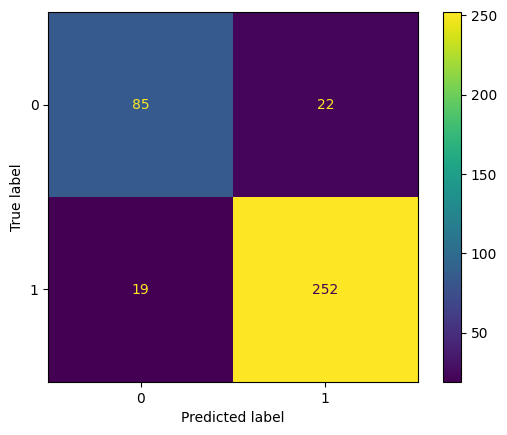

Y-TRAIN SET


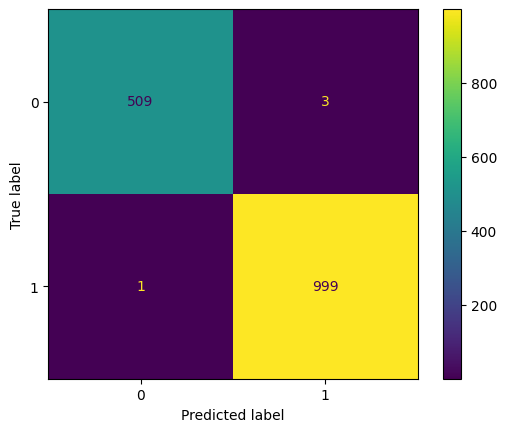


Classification report TEST:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       107
           1       0.92      0.93      0.92       271

    accuracy                           0.89       378
   macro avg       0.87      0.86      0.87       378
weighted avg       0.89      0.89      0.89       378


Classification report TRAIN:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       512
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      1512
   macro avg       1.00      1.00      1.00      1512
weighted avg       1.00      1.00      1.00      1512



In [29]:
# Predict values for the test set
y_pred_train = LogMod.predict(X_train)
y_pred_test = LogMod.predict(X_test)

# Print a confusion matrix and classification report
print(f"The Test model:\n{confusion_matrix(y_test, y_pred_test)}")
print(f"The Train model:\n{confusion_matrix(y_train, y_pred_train)}")

matrix_test = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test) ,display_labels=NBMod.classes_) # Without display_labels it will show class
matrix_train = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train) ,display_labels=NBMod.classes_)                                                          

print("="*30 + "\nY-TEST SET\n" + "="*30)
matrix_test.plot()
plt.show()
print("="*30 + "\nY-TRAIN SET\n" + "="*30)
matrix_train.plot()
plt.show()

print("\nClassification report TEST:")
print(classification_report(y_test,y_pred_test))

print("\nClassification report TRAIN:")
print(classification_report(y_train,y_pred_train))

Also try and play with the hyperparameters a bit

## Conclusion
**What can we conclude regarding the metrics of both models**

Naive bayes scores less good on the metrics than the logistic regression model.

**What can we conclude regarding the time it takes to train the model?**

Naive bayes runs a lot faster than the logistic regression algorithm on this sparse data. Escpecially when the C value of the logistic regression model is increased, this gets very noticable. We also need to increase max_iter as to not get a "value did not converge" error.


# MNIST dataset
MNIST is the "hello world" of AI.

MNIST is a dataset containing a lot of handwritten digits. The goal is to correctly identify the written digit from the image. There is a lot of different sets and subsets available online. The data that we will be using is coming from
https://www.kaggle.com/c/digit-recognizer/data

Each image contains 28x28 pixels => 784 values between 0 (black) and 255 (white)

Some initial code is given as to show you how to display the images

In [30]:
# Read in the dataset
df = pd.read_csv("data/MNIST.csv")

In [31]:
# Take a look at the first rows of the dataset
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='label', ylabel='count'>

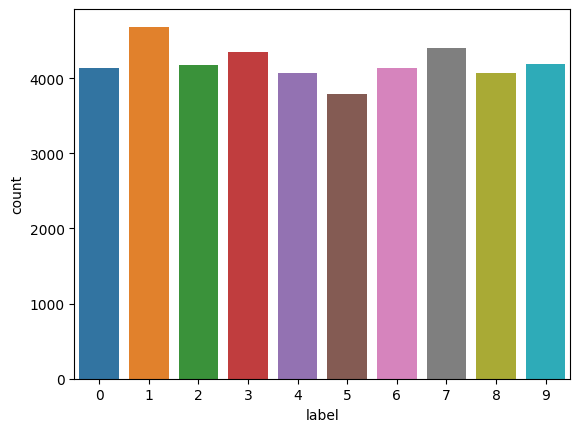

In [32]:
# Countplot of the numbers
sns.countplot(x="label",data=df)

In [33]:
# Split into features and targets
X = df.drop("label",axis=1)
y = df.label

Label: 4


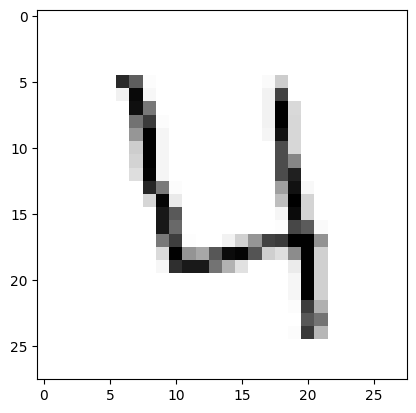

In [34]:
# Change this value to see another sample
row_num_X = 3

# Extract the image from X
single_image= X.iloc[row_num_X,:]  ## Row row_num_X, column all (:)

# Convert the single array of 784 pixels into nested arrays as to creat a 28x28 array
# [p0,p1,p2,p3,...,p784] becomes

# [[p0,p1,p2,p3,...,p27]
#  [p28,p29,p30,    ...]
#  ...
#  [          ..., p783]]
single_image_to_28x28 = single_image.values.reshape(28,28)

# Show the image
plt.imshow(single_image_to_28x28,cmap='Greys')
# Also print the corresponding label
print(f"Label: {y[row_num_X]}")

In [35]:
# Split into training and test set. Keep +-20% as a test_set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [37]:
# Train a multinomial naive bayes model on the data and test it using the test data
NB = MultinomialNB(alpha = 5)

NB.fit(X_train, y_train)

print(f" The test score of the train model: {NB.score(X_train, y_train)}")
print(f" The test score of the train model: {NB.score(X_test, y_test)}")

 The test score of the train model: 0.8280952380952381
 The test score of the train model: 0.8233333333333334


In [39]:
# Predict values for the test set
y_pred_train = NB.predict(X_train)
y_pred_test = NB.predict(X_test)
# Print a confusion matrix and classification report
print(f"The Test model:\n{confusion_matrix(y_test, y_pred_test)}")
print(f"The Train model:\n{confusion_matrix(y_train, y_pred_train)}")

print("\nClassification report TEST:")
print(classification_report(y_test,y_pred_test))

print("\nClassification report TRAIN:")
print(classification_report(y_train,y_pred_train))

The Test model:
[[737   0   5   3   2  12  20   0  34   0]
 [  0 883   6   6   0   2   6   0  42   5]
 [  7  16 680  21  13   1  36  11  42   3]
 [  3  16  41 733   1  25  10   6  44  18]
 [  4   3   9   0 580   3  16   2  33 157]
 [ 23  10   7  89  22 516  14   0  77  30]
 [ 11  18  10   2   1  18 717   0  14   0]
 [  0  10   8   0  20   0   2 733  41  72]
 [  6  40  10  32   7  26   2   3 643  28]
 [  4   7   3  13  62   4   0  21  33 694]]
The Train model:
[[3030    1   17   10    4   34   48    0  169    6]
 [   0 3492   25   22    2   17   17    2  149    8]
 [  39   38 2789   72   36    6  152   28  178    9]
 [  20   61  164 2785    7   69   41   28  173  106]
 [   9    9   19    2 2423    6   62    7  134  594]
 [  83   24   23  352   63 1996   70    9  287  100]
 [  31   54   33    1   25   82 3076    0   44    0]
 [  23   62   24   13   79    1    4 2895  111  303]
 [  13  169   40  171   40  129   26   11 2554  113]
 [  20   25   11   35  237   14    2   84  135 2784]]

Clas

In [40]:
# Also try it using a logistic regression model
LogMod = LogisticRegression(penalty="l2", C = 2, class_weight="balanced", max_iter=10000)

LogMod.fit(X_train,y_train)

print(f" The test score of the train model: {LogMod.score(X_train, y_train)}")
print(f" The test score of the train model: {LogMod.score(X_test, y_test)}")

 The test score of the train model: 0.9605952380952381
 The test score of the train model: 0.8909523809523809


C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Test model:
[[770   0   9   0   1   8  14   1   8   2]
 [  0 906   8   5   0   4   2   1  18   6]
 [ 10  22 706  19  15   7  13  11  25   2]
 [  4   8  27 763   3  43   6  11  20  12]
 [  4   6   9   4 720   3  16   3   7  35]
 [ 15  11   8  25  19 641  28   2  28  11]
 [  9   2  16   2   3  11 741   0   6   1]
 [  2   6  12   7   6   1   2 812   2  36]
 [  4  18  11  18   5  22   7   4 697  11]
 [  4   3   8  15  31   9   0  31  12 728]]
The Train model:
[[3299    0    3    2    1    3    2    0    9    0]
 [   0 3710    2    6    0    0    0    2   12    2]
 [   5    4 3194   34   17   12   10   19   45    7]
 [   5    1   54 3211    0   89    3   17   52   22]
 [   0    4   11    0 3155    3   10    7   10   65]
 [   8    1   12   58   16 2818   20    2   61   11]
 [   4    3   10    0    8   22 3289    0   10    0]
 [   0    1   21    7   13    1    1 3384   13   74]
 [   3   12   22   58    3   57   10    7 3072   22]
 [   3    4    3   26   58   17    0   72   20 3144]]
Y-TES

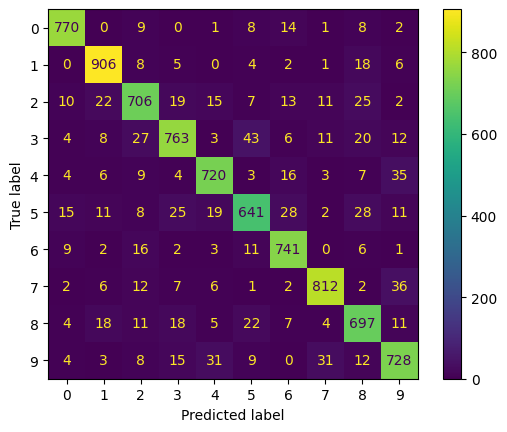

Y-TRAIN SET


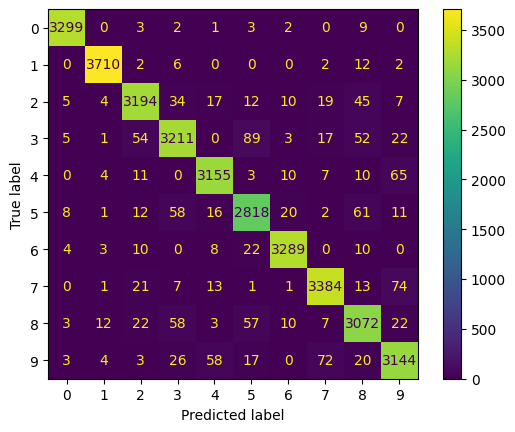


Classification report TEST:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       813
           1       0.92      0.95      0.94       950
           2       0.87      0.85      0.86       830
           3       0.89      0.85      0.87       897
           4       0.90      0.89      0.89       807
           5       0.86      0.81      0.83       788
           6       0.89      0.94      0.91       791
           7       0.93      0.92      0.92       886
           8       0.85      0.87      0.86       797
           9       0.86      0.87      0.86       841

    accuracy                           0.89      8400
   macro avg       0.89      0.89      0.89      8400
weighted avg       0.89      0.89      0.89      8400


Classification report TRAIN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3319
           1       0.99      0.99      0.99      3734
           2       

In [42]:
# Predict values for the test set
y_pred_train = LogMod.predict(X_train)
y_pred_test = LogMod.predict(X_test)

# Print a confusion matrix and classification report
print(f"The Test model:\n{confusion_matrix(y_test, y_pred_test)}")
print(f"The Train model:\n{confusion_matrix(y_train, y_pred_train)}")

matrix_test = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test) ,display_labels=LogMod.classes_) # Without display_labels it will show class
matrix_train = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train) ,display_labels=LogMod.classes_)                                                          

print("="*30 + "\nY-TEST SET\n" + "="*30)
matrix_test.plot()
plt.show()
print("="*30 + "\nY-TRAIN SET\n" + "="*30)
matrix_train.plot()
plt.show()

print("\nClassification report TEST:")
print(classification_report(y_test,y_pred_test))

print("\nClassification report TRAIN:")
print(classification_report(y_train,y_pred_train))

Following code let's you draw a number and predict it using your model

The model should be called 'model' or be renamed in the code below

Note that you need packages pillow and tkinter

`conda install pillow tk` or `pip3 install pillow tk` or `sudo dnf install python3-pillow python3-tkinter`

In [ ]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

width = 280  # canvas width
height = 280 # canvas height
center = height//2
white = (255) # canvas back

def predict():
    op2 = PIL.ImageChops.invert(output_image)
    op2=op2.resize((28,28),resample=3)
    # Show the image
    plt.imshow(op2,cmap='Greys')
    op2_array = np.asarray(op2).reshape(1,-1)
    print(model.predict(op2_array))
    
def clear():
    plt.close()
    canvas.delete("all")
    draw.rectangle((0,0,width,height),fill=255)
    
def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=25)
    draw.line([x1, y1, x2, y2],fill="black",width=25)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("L", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="predict",command=predict)
button.pack()
button=Button(text="clear",command=clear)
button.pack()

master.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\uniro\AppData\Local\Temp\ipykernel_2444\4288243161.py", line 16, in predict
    print(model.predict(op2_array))
NameError: name 'model' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\uniro\AppData\Local\Temp\ipykernel_2444\4288243161.py", line 16, in predict
    print(model.predict(op2_array))
NameError: name 'model' is not defined
